# Extra Credit HW - Classification

Welcome the extra credit assignment for DSC 10!  

#### About this assignment: 
This is an **optional** assignment. If you choose to do it, your score on this assignment will replace your lowest homework score. In the event that your score on this assignment is lower than all your homework scores, then your lowest homework score will *not* be replaced, so there is no harm in attempting this assignment.

This assignment introduces you to the classification problem in machine learning. We will not cover classification in lecture, but it is covered in your textbook. To start this assignment, you should first read through [Chapter 17 of your textbook](https://www.inferentialthinking.com/chapters/17/Classification.html).


#### Due date: 
This assignment is due on **Wednesday, June 5 at 11:59pm**. If you have a slip day remaining, you can use one to extend the due date to Thursday.

#### Learning goals:
We will be analyzing San Diego burritos and classifying whether or not people recommend them.  By the end of the project, you should know how to:

1. Build a k-nearest-neighbors classifier.
2. Test a classifier on data.
3. Evaluate different sets of features.
4. Evaluate your classifier

**Run the cell below** to prepare the automatic tests. **Passing the automatic tests does not guarantee full credit on any question.** The tests are provided to help catch some common errors, but it is your responsibility to answer the questions correctly.

In [1]:
# Run this cell, but please don't change it.

import numpy as np
import math
from datascience import *
from scipy import stats

# These lines set up the plotting functionality and formatting.
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Don't change this cell; just run it. 
from client.api.notebook import Notebook
ok = Notebook('ec_hw.ok')
#_ = ok.auth(inline=True, force=True)

Assignment: Extra Credit HW: Burrito Classification
OK, version v1.13.11



# 1. The Dataset

## 1.1 Getting to Know Our Dataset

Our dataset is a table of burrito reviews, collected by [Scott Cole](https://srcole.github.io/100burritos/), a data scientist in San Diego. The data was collected via a form that burrito eaters can fill out to give their impressions of a particular burrito. The burrito reviewer scores their burrito in ten different dimensions or features, such as volume, quality of fillings, quality of meat, etc. In addition, two summary ratings are included: whether you'd recommend the burrito to a friend, and an overall rating on a scale of 0 to 5. Cole's dataset contains over 350 burrito reviews, and if you want to contribute to his data science project by reviewing a burrito, just [fill out the form here](https://docs.google.com/forms/d/e/1FAIpQLSdWAkbSKzHydtzJ-AKHp_rXKHeG80cZuUBjyEeMAUZXJsiFKQ/viewform).

For your reference, we include the full description of the ten features, quoted from [Cole's website](https://srcole.github.io/100burritos/).

"Contrary to popular belief, burritos do not merely exist in 3 dimensions. They transcend the physical limitations of space. From polling several San Diegans, we’ve established the 10 core dimensions of the San Diego burrito.

1. **Volume** - “size matters,” “bigger is better,” or whatever your favorite innuendo is fits because there’s nothing more disconcerting than ordering a burrito and not being full.
2. **Tortilla quality**
3. **Temperature** - the Goldilocks zone
4. **Meat quality**
5. **Non-meat filling quality**
6. **Meat:filling** - The ratio between meat and non-meat. Perhaps the golden ratio: 1.6180339887...
7. **Uniformity** - Bites full of sour cream and cheese with no meat are disappointing.
8. **Salsa quality** - and variety!
9. **Flavor synergy** - "That magical aspect a great burrito has, making everything come together like it is a gift from the skies" - A wise Dutchman
10. **Wrap integrity** - you ordered a burrito, not a burrito bowl.   

All of these measures (except for Volume) are rated on a scale from 0 to 5, 0 being terrible, and 5 being optimal. In the future, Meat:Filling and Temperature measures may stray from this subjective scale in order to better quantify these two valuable burrito characteristics. Additionally, acquisition of a portable scale will allow collection of mass. Cost (in USD) and hunger level (on the same 0-5 scale) are measured as potential control factors. In addition to these 10 core dimensions, we also collect two summary statistics:

* Overall rating - 0 to 5 stars
* Recommendation - Yes/No. If a friend asked you about that burrito with the intent of purchasing one, would you recommend it?"

In this assignment, we will be trying to classify whether or not a burrito is recommended or not, based on it's scores in the ten features. 

Run the cell below to read in the `burritos` table. 

In [2]:
burritos_dataset = Table.read_table('burritos.csv')
burritos_dataset.show(5)

Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Reviewer,Notes,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Recommended
Rudy's Taco Shop,Chicken,4/9/2016,Solana Beach,524 Stevens Ave,http://www.rudystacoshop.com/,4,4.3,nan,6.6,3.5,nan,nan,nan,nan,nan,3.5,3,4,4.5,3,1,3,4,0.5,2.8,Scott,"Salsa Fresca is good, way too small",nan,nan,nan,X,X,nan,nan,nan,nan,X,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,No
Rudy's Taco Shop,Carnitas,4/9/2016,nan,nan,nan,nan,nan,nan,6.6,3,nan,nan,nan,nan,nan,3,2.5,3,4,2,1,3,3,5,3,Emily,nan,nan,nan,nan,X,X,nan,nan,nan,X,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,No
Taco Stand,Carne asada,4/14/2016,nan,nan,nan,nan,nan,nan,7.89,3.5,nan,nan,nan,nan,nan,3,2,4.5,4,4,1.5,4.5,4.5,4.5,4.4,Scott,Too small,nan,nan,X,X,X,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Yes
Taco Stand,Carne asada,4/14/2016,nan,nan,nan,nan,nan,nan,7.89,2,nan,nan,nan,nan,nan,3,2.5,4.5,3.5,4.5,3,4,3.5,5,3.5,Richard,A little small. No rice and beans or cheese or sour cream,nan,nan,x,x,x,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Yes
California Burritos,California Everything,4/15/2016,Linda Vista,7754 Starling Dr,https://www.yelp.com/biz/california-burritos-san-diego,4.5,4.4,x,6.25,4,nan,nan,nan,nan,nan,4.5,4.5,2.5,3.5,3.5,3.5,3,4,5,4.1,Scott,nan,nan,nan,x,x,x,x,x,x,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Yes


**Question 1.1** First, let's try to get a list of all the burrito locations mentioned in the table, along with how many reviews they have. Assign the variable `burrito_places` to be a new table with two columns, where one column records the burrito location, and the other column records the number of reviews it has. 

Note that some places may be listed more than once because reviewers might have filled out the form differently. For example, there will be separate rows for "California Burrito Company", "California Burritos", and California burritos" in the table `burrito_places`, even though these are likely all the same restaurant. You don't need to reconcile these differences for this question, but just notice that these types of issues are likely to be present when working with real data.

In [3]:
burrito_places = burritos_dataset.group("Location")
burrito_places

Location,count
Albertacos,2
Burrito Box,1
Burrito Factory,1
Burros and Fries,4
Caliente Mexican Food,4
California Burrito Company,5
California Burritos,23
California burritos,6
Cancun Mexican & Seafood,6
Carmen's Mexican Food,2


In [4]:
burrito_places.labels == ('Location', 'count')

True

In [5]:
_ = ok.grade('q1_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.2** Which two burrito locations have the most reviews?
Set `most_reviews_1` and `most_reviews_2` to be the burrito locations with most and second most number of reviews. The order doesn't matter.

In [6]:
# Use the burrito_places table to find out which  location has the most reviews
burrito_places.sort("count", descending=True)

Location,count
Taco Villa,28
Lucha Libre North Park,28
Taco Stand,25
Rigoberto's Taco Shop,25
California Burritos,23
Los Tacos,12
Los Primos Mexican Food,12
El Zarape,10
Vallarta express,9
Valentines Mexican Food,9


In [7]:
most_reviews_1 = "Taco Villa"
most_reviews_2 = "Lucha Libre North Park"

In [8]:
isinstance(most_reviews_1,str) and isinstance(most_reviews_2,str)

True

In [9]:
_ = ok.grade('q1_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 1.2 Cleaning our Data

Taking a look at our data, we can notice something odd.

In [10]:
# Print out the unique elements in the recommended column
recommended_column = burritos_dataset.column("Recommended")
np.unique(recommended_column)

array(['No', 'Yes', 'nan'], 
      dtype='<U3')

In [11]:
# Print out the unique elements in the recommended column
recommended_column = burritos_dataset.column("Meat")
np.unique(recommended_column)

array([ 1.  ,  1.5 ,  2.  ,  2.5 ,  2.6 ,  2.7 ,  2.75,  2.8 ,  3.  ,
        3.2 ,  3.3 ,  3.5 ,  3.7 ,  3.75,  3.8 ,  3.9 ,  4.  ,  4.1 ,
        4.2 ,  4.3 ,  4.5 ,  4.7 ,  5.  ,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan])

Notice that some of the rows say `nan`. `nan` means "not a number". In this case, the reviews that left the recommendation field empty are instead filled with the term `nan`.

**Question 1.3**  Let's get rid of those `nan` rows in our table, and only keep the other rows. Set the variable `cleaned_table` to this new modified table. 

For the `Recommended` column, because the `nan`s are just strings, we can remove them by filtering out the rows in which the "Recommended" column has the string `"nan"`. Remove all such rows and save your result as `cleaned_table`.

In [12]:
cleaned_table = burritos_dataset.where("Recommended", are.not_equal_to("nan"))

# Check that nans were removed
recommended_column = cleaned_table.column("Recommended")
np.unique(recommended_column)

array(['No', 'Yes'], 
      dtype='<U3')

For the `Meat` and `Tortilla` columns, these nans are actually not strings, but numbers. Therefore, `are.not_equal_to` on a string `nan` wont work! We can use a trick to remove them from the data by only picking data values that are above -1. Try this strategy to remove all the rows with `nan`s in the `Meat` column or the `Tortilla` column. Save your result as `cleaned_table`.

In [13]:
cleaned_table = cleaned_table.where("Meat", are.above(-1))

# Check that nans were removed from Meat
meat_column = cleaned_table.column("Meat")
np.unique(meat_column)

array([ 1.  ,  1.5 ,  2.  ,  2.5 ,  2.6 ,  2.7 ,  2.8 ,  3.  ,  3.3 ,
        3.5 ,  3.7 ,  3.75,  3.8 ,  4.  ,  4.1 ,  4.2 ,  4.5 ,  4.7 ,  5.  ])

# 2. K-Nearest Neighbors (KNN)

## 2.1 KNN - a Guided Example

**KNN algorithm** is one of the simplest classification algorithms and it is one of the most used learning algorithms. But wait, what is classification?

**Classification** is the process of predicting the class of given data points. Classes are sometimes called labels or categories.

Make sure to read through [Chapter 17 of your textbook](https://www.inferentialthinking.com/chapters/17/Classification.html) to learn more about KNN. We will briefly introduce it here.

Let's look at the example at the beginning of [Chapter 17](https://www.inferentialthinking.com/chapters/17/Classification.html). We have a dataset that was collected to help doctors diagnose **chronic kidney disease (CKD)**, which includes several measurements from a blood test. We’d like to find which measurements are most useful for diagnosing CKD, and develop a way to **classify a future patient as “has CKD”** or **“doesn’t have CKD”** based on their blood test results.


In [14]:
ckd = Table.read_table('ckd.csv').relabeled('Blood Glucose Random', 'Glucose')
ckd

Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,1
53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,1
63,70,1.01,3,0,abnormal,abnormal,present,notpresent,380,60,2.7,131,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,1
68,80,1.01,3,2,normal,abnormal,present,present,157,90,4.1,130,6.4,5.6,16,11000,2.6,yes,yes,yes,poor,yes,no,1
61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,148,3.9,135,5.2,7.7,24,9200,3.2,yes,yes,yes,poor,yes,yes,1
48,80,1.025,4,0,normal,abnormal,notpresent,notpresent,95,163,7.7,136,3.8,9.8,32,6900,3.4,yes,no,no,good,no,yes,1
69,70,1.01,3,4,normal,abnormal,notpresent,notpresent,264,87,2.7,130,4,12.5,37,9600,4.1,yes,yes,yes,good,yes,no,1
73,70,1.005,0,0,normal,normal,notpresent,notpresent,70,32,0.9,125,4,10,29,18900,3.5,yes,yes,no,good,yes,no,1
73,80,1.02,2,0,abnormal,abnormal,notpresent,notpresent,253,142,4.6,138,5.8,10.5,33,7200,4.3,yes,yes,yes,good,no,no,1
46,60,1.01,1,0,normal,normal,notpresent,notpresent,163,92,3.3,141,4,9.8,28,14600,3.2,yes,yes,no,good,no,no,1


Now, we will only look at a few important factors among all the measurements taken: Hemoglobin and Glucose. We will also work entirely in standard units so we don't have to worry about the scale of each measurement.

In [15]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers) 

ckd = Table().with_columns(
    'Hemoglobin', standard_units(ckd.column('Hemoglobin')),
    'Glucose', standard_units(ckd.column('Glucose')),
    'Class', ckd.column('Class')
)
ckd

Hemoglobin,Glucose,Class
-0.865744,-0.221549,1
-1.45745,-0.947597,1
-1.00497,3.84123,1
-2.81488,0.396364,1
-2.08395,0.643529,1
-1.35303,-0.561402,1
-0.413266,2.04928,1
-1.28342,-0.947597,1
-1.10939,1.87936,1
-1.35303,0.489051,1


The dataset above is called a **training set**, which is a set of examples with known classes (in our case, “has CKD” is Class 1, “doesn’t have CKD” is Class 0) that we can learn from. For example, by seeing the Hemoglobin and Glucose of patients with CKD and comparing those numbers to those of patients without CKD, we can get a sense of how these medical markers indicate the presence or absence of CKD.

We’ll draw a scatter plot to visualize the relation between the two variables, Hemoglobin and Glucose. Blue dots are patients with CKD; gold dots are patients without CKD. What kind of medical test results seem to indicate CKD?

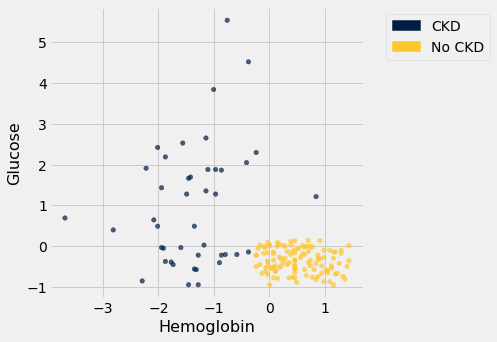

In [16]:
color_table = Table().with_columns(
    'Class', make_array(1, 0),
    'Color', make_array('CKD', 'No CKD')
)
ckd = ckd.join('Class', color_table)

ckd.scatter('Hemoglobin', 'Glucose', colors='Color')

Suppose Alice is a new patient who is not in the data set. If I tell you Alice’s hemoglobin level and blood glucose level, could you predict whether she has CKD? Probably, you could. You would plot Alice's location on the axes above. If she fell in the lower-right region, you would predict that she did not have CKD, and otherwise you would predict that she did have CKD. 

The k-Nearest Neighbors algorithm is based on the intuitive idea that Alice should be put into the same category (CKD or no CKD) as people whose Hemoglobin and Glucose are similar to hers. To classify Alice as CKD or not, we find the patient in the training set who is “nearest” to Alice, and then use that patient’s diagnosis as our prediction for Alice. The intuition is that if two points are near each other in the scatterplot, then the corresponding measurements are pretty similar, so we might expect them to receive the same diagnosis (more likely than not). 

If Alice is the red dot in the picture below, then she would be classified as having CKD because she is nearest to a blue dot, which represents someone with CKD.

<img src="alice.png" />

Thus our nearest neighbor classifier works like this:

Find the point in the training set that is nearest to the new point.
If that nearest point is a “CKD” point, classify the new point as “CKD”. If the nearest point is a “not CKD” point, classify the new point as “not CKD”.

The idea of using Alice's nearest neighbor in the dataset to predict her class can be extended to more than one neighbor. Rather than finding the single person who is nearest to Alice, we can find the `k` people in the dataset who are closest to Alice. If we choose `k` to be an odd number, then one of the two classes will be a majority among Alice's `k` neighbors. So we can classify Alice as whichever is more popular among her `k` nearest neighbors: CKD or not CKD.

## 2.2 Preparing to Classify a Burrito - Understand the Data, Write Functions

Now, let's try using classification in our burrito example. You'll plot the burritos as data points on a scatterplot, and then given a new burrito, you'll use KNN to decide whether you recommend it or not.

With KNN, we classify a burrito by finding the `k` reviews in the dataset that are most similar according to the features we choose. We call those reviews with similar features the "neighbors".  The KNN algorithm assigns the recommendation to the most common recommendation among its `k` neighbors.

Instead of working with all ten features of a burrito, let's limit ourselves to just 2 features for now. The features we will use are the ratings for `Tortilla` and `Meat`. 

**Question 2.1** Create a new table called `burritos` that only has the columns  "Tortilla", "Meat", and "Recommended". Make sure to start with `cleaned_table` so you don't have any `nan` values.

In [17]:
cleaned_table

Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Reviewer,Notes,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Recommended
Rudy's Taco Shop,Chicken,4/9/2016,Solana Beach,524 Stevens Ave,http://www.rudystacoshop.com/,4,4.3,nan,6.6,3.5,nan,nan,nan,nan,nan,3.5,3,4,4.5,3,1,3,4,0.5,2.8,Scott,"Salsa Fresca is good, way too small",nan,nan,nan,X,X,nan,nan,nan,nan,X,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,No
Rudy's Taco Shop,Carnitas,4/9/2016,nan,nan,nan,nan,nan,nan,6.6,3,nan,nan,nan,nan,nan,3,2.5,3,4,2,1,3,3,5,3,Emily,nan,nan,nan,nan,X,X,nan,nan,nan,X,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,No
Taco Stand,Carne asada,4/14/2016,nan,nan,nan,nan,nan,nan,7.89,3.5,nan,nan,nan,nan,nan,3,2,4.5,4,4,1.5,4.5,4.5,4.5,4.4,Scott,Too small,nan,nan,X,X,X,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Yes
Taco Stand,Carne asada,4/14/2016,nan,nan,nan,nan,nan,nan,7.89,2,nan,nan,nan,nan,nan,3,2.5,4.5,3.5,4.5,3,4,3.5,5,3.5,Richard,A little small. No rice and beans or cheese or sour cream,nan,nan,x,x,x,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Yes
California Burritos,California Everything,4/15/2016,Linda Vista,7754 Starling Dr,https://www.yelp.com/biz/california-burritos-san-diego,4.5,4.4,x,6.25,4,nan,nan,nan,nan,nan,4.5,4.5,2.5,3.5,3.5,3.5,3,4,5,4.1,Scott,nan,nan,nan,x,x,x,x,x,x,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Yes
California Burritos,California Everything,4/15/2016,nan,nan,nan,nan,nan,nan,6.25,3.5,nan,nan,nan,nan,nan,4,4,4,2.5,3,3.5,4,4,5,4,Brent,Brent doesn't like fries in his burrito,nan,nan,x,x,x,x,x,x,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,No
California Burritos,California Everything,4/15/2016,nan,nan,nan,nan,nan,nan,6.25,4,nan,nan,nan,nan,nan,4,4.5,4.5,5,5,5,4.5,5,5,4.6,Luis,nan,nan,nan,x,x,x,x,x,x,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Yes
California Burritos,Chile relleno and carnitas,4/15/2016,nan,nan,nan,nan,nan,nan,6.5,5,nan,nan,nan,nan,nan,4.5,5,5,5,5,4,4,5,5,4.7,Karl,nan,x,nan,nan,x,nan,x,nan,x,x,nan,nan,nan,x,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,x,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Yes
California Burritos,California (only cheese),4/15/2016,nan,nan,nan,nan,nan,nan,6.25,2,nan,nan,nan,nan,nan,5,5,5,4,4,2,nan,5,5,5,Kalen,nan,x,nan,x,nan,nan,x,x,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Yes
Jorge's Mexicatessen,California,4/24/2016,Encinitas,267 N El Camino Real,https://www.yelp.com/biz/jorges-mexicatessen-encinitas,4,4.5,nan,5.95,3.5,nan,nan,20,22,0.77,2.5,2.5,3.5,4,3,4.5,4,4.5,4.5,3.8,Scott,"Cheese should be melted, potatoes are very good",nan,nan,X,nan,nan,X,X,X,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Yes


In [18]:
burritos = cleaned_table.select('Tortilla', 'Meat', 'Recommended')
burritos

Tortilla,Meat,Recommended
3.5,4,No
3,3,No
3,4.5,Yes
3,4.5,Yes
4.5,2.5,Yes
4,4,No
4,4.5,Yes
4.5,5,Yes
5,5,Yes
2.5,3.5,Yes


In [19]:
burritos.labels == ('Tortilla', 'Meat', 'Recommended')

True

In [20]:
_ = ok.grade('q2_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Run the next cell to display a scatterplot of the data above.

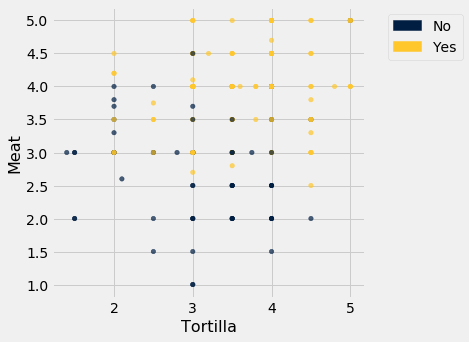

In [21]:
burritos.scatter(0,1, colors="Recommended")

**Question 2.2**  What do you notice about this plot? Where are most of the YES recommendations located, where are most of the NO recommendations located, and does this match what you would expect?

***
Most of the YES recommendations are towards the top right, where meat and tortilla values are high. Most of the NO recommendations are towards the bottome left, where meat and torilla values are lower. This matches what I would expect as I would personally recommend burritos with more meat and better tortilla.
***

**Question 2.3** Intuitively, if a burrito had a meat rating of 2.0 and a tortilla score of 3.3, would you guess that it is recommended, or not recommended? Set the variable `recc` to True if you think it would be recommended and False if you think it wouldn't.

In [22]:
recc = False

In [23]:
recc in [True, False]

True

In [24]:
_ = ok.grade('q2_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Now that we generally know how to do this visually, let's start trying to implement this with code. Recall that the process of KNN is as follows
* Given a new point, find the distance between that point and every single other point in the data set.
* Determine the nearest `k` points.
* Find the majority class of the nearest `k` points. If there is a tie, pick one at random.

**Question 2.4**  To help us break down this process, let's make some useful functions, starting with `distance`. The function `distance` should take in two tuples and returns the distance between the two. Recall the distance formula from math:  
$$dist((x_1, y_1), (x_2, y_2)) = \sqrt{(x_1-y_1)^2+(x_2-y_2)^2}$$


# EQUATION IS WRONG X-X, Y-Y

In [25]:
def distance(point1, point2):
    x_math = (point1[0]-point2[0])**2
    y_math = (point1[1]-point2[1])**2
    
    return np.sqrt(x_math+y_math)

In [26]:
distance(make_array(1, 1), make_array(4, 5)) #should return 5.0

5.0

**Question 2.5** Now that we can calculate the distance between two points, let's write a function that will calculate the distance between a point and every other point in the dataset. Write a function that called `all_distances` that takes as input the name of a `table` and the features of a `new_point`, and returns the table with a new column with each row's distance to the new point.

**Hint:** Use the `distance` method that you implemented above.

In [27]:
burritos.apply?

In [101]:
def all_distances(table, new_point):
    """Appends a column of distances
    between each point in the training set
    and the new point (which is a row of attributes)"""
    # Create a table with only the features
    attributes = table.select(0, 1)
    # Calculate the distance between new_point and each row of table
    new_column = make_array() 
    for i in range(table.num_rows):
        oth_pt = make_array(attributes.column(0)[i], attributes.column(1)[i])
        new_column = np.append(new_column, distance(oth_pt, new_point))
        
    # Append distance column and previously saved recommended column
    table = table.with_column('Distance', new_column)
    return table

Make sure your `all_distances()` function works with this line below. You should see 4 columns in total; `Tortilla`,  `Meat`,  `Recommended`, and `Distance`. 

In [102]:
distance_table_test = all_distances(burritos, make_array(4, 4))
distance_table_test

Tortilla,Meat,Recommended,Distance
3.5,4,No,0.5
3,3,No,1.41421
3,4.5,Yes,1.11803
3,4.5,Yes,1.11803
4.5,2.5,Yes,1.58114
4,4,No,0
4,4.5,Yes,0.5
4.5,5,Yes,1.11803
5,5,Yes,1.41421
2.5,3.5,Yes,1.58114


**Question 2.6** Now let's make a function that selects the nearest k points. Call this function `closest_k`. This function takes in a `table`(of the same form as the output of `all_distances`) and a value of `k` and returns a table containing only the `k` rows corresponding to the shortest distances. If there is a tie for shortest distance among more than `k` rows, you can return a table with any `k` such rows.


In [103]:
def closest_k(table, k):
    """Returns a table of the k rows of the augmented table
    corresponding to the k smallest distances"""
    return table.sort("Distance", descending=False).take(np.arange(1, k+1))

Once again, let's test that our closest function works by calling it on `distance_table_test`. You can play around with different k values to see what your function outputs.

In [104]:
top_k_test = closest_k(distance_table_test, 5)
top_k_test.show()

Tortilla,Meat,Recommended,Distance
4,4,Yes,0
4,4,Yes,0
4,4,Yes,0
4,4,Yes,0
4,4,Yes,0


**Question 2.7** We're almost there! Let's write a function called `majority` that, when given a table such as the one above, will return "Yes" or "No", whichever is more common in the "Recommended" column. If there is a tie, return "Yes" or "No" at random.

In [105]:
def majority(table):
    return table.group("Recommended").sort("count", descending=True).column(0)[0]

In [106]:
majority(top_k_test)

'Yes'

In [40]:
test = Table().with_column('Recommended',['Yes','Yes','Yes','No','No','No','No'])
test

Recommended
Yes
Yes
Yes
No
No
No
No


In [41]:
majority(test)

'No'

In [42]:
_ = ok.grade('q2_7')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.8** Let's put all these functions together to create our final function, `classify`. Classify should take in a `table` of training data, the coordinates of a `new_point` (to be classified), and a value of `k` and return "Yes" or "No", our prediction for the class of the new point.

In [ ]:
all_distances, closest_k, majority

In [43]:
def classify(table, new_point, k):
    new_table = all_distances(table, new_point)
    return majority(closest_k(new_table,k))

Before we celebrate, let's make sure it works.  Here are some values you can check

In [44]:
classify(burritos, make_array(4, 4), 5) #output should be 'Yes'

'Yes'

In [45]:
classify(burritos, make_array(0,0), 3) #output should be 'No'

'No'

In [46]:
classify(burritos, make_array(5, 5), 3) #output should be 'Yes'

'Yes'

# 3. Analyzing Burrito Features - What's Most Important for a Burrito? 


Up until now, we have been classifying burritos based on two features, "Tortilla" and "Meat." But are these features actually important in determining overall rating? Remember, our data set included lots of different features of a burrito.

In [47]:
burritos_dataset.labels

('Location',
 'Burrito',
 'Date',
 'Neighborhood',
 'Address',
 'URL',
 'Yelp',
 'Google',
 'Chips',
 'Cost',
 'Hunger',
 'Mass (g)',
 'Density (g/mL)',
 'Length',
 'Circum',
 'Volume',
 'Tortilla',
 'Temp',
 'Meat',
 'Fillings',
 'Meat:filling',
 'Uniformity',
 'Salsa',
 'Synergy',
 'Wrap',
 'overall',
 'Reviewer',
 'Notes',
 'Unreliable',
 'NonSD',
 'Beef',
 'Pico',
 'Guac',
 'Cheese',
 'Fries',
 'Sour cream',
 'Pork',
 'Chicken',
 'Shrimp',
 'Fish',
 'Rice',
 'Beans',
 'Lettuce',
 'Tomato',
 'Bell peper',
 'Carrots',
 'Cabbage',
 'Sauce',
 'Salsa.1',
 'Cilantro',
 'Onion',
 'Taquito',
 'Pineapple',
 'Ham',
 'Chile relleno',
 'Nopales',
 'Lobster',
 'Queso',
 'Egg',
 'Mushroom',
 'Bacon',
 'Sushi',
 'Avocado',
 'Corn',
 'Zucchini',
 'Recommended')

That's a lot of features. In thise section, we'll find out which burrito features are the most important in determining the overall rating. 

To do this, we are going to note the `overall` rating of the burrito, which is rated on a scale from 0 to 5. We can then plot this `overall` rating against a certain feature and draw a regression line. A steeper regression line implies that the feature has more of an effect on the `overall` rating. Let's take a step back and intuitively check if that is true.

Intuitively, you might guess that the quality of the meat is a more important factor than the temperature of a burrito in determining the overall quality of a burrito. Let's see if this is true.

Run the next cell to plot the regression line for Meat Rating VS Overall Rating

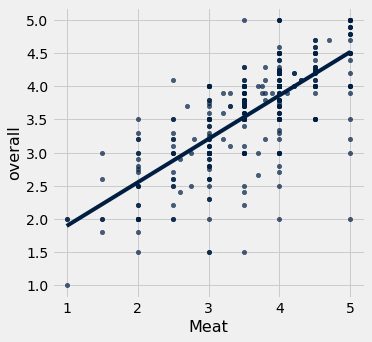

In [48]:
cleaned_table = burritos_dataset.where("Meat", are.above(-1)).where('overall', are.above(-1))
cleaned_table.scatter("Meat", "overall", fit_line=True)

Run the next cell to plot the regression line for Temperature Ratings VS Overall Rating

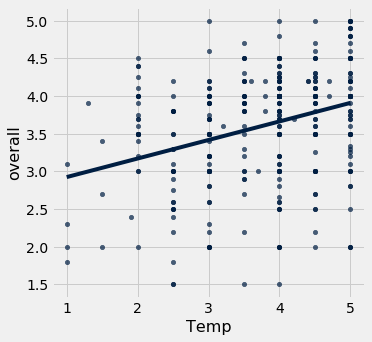

In [49]:
cleaned_table = burritos_dataset.where("Temp", are.above(-1)).where('overall', are.above(-1))
cleaned_table.scatter("Temp", "overall", fit_line=True)

The slope of the regression line for the Temperature Ratings VS Overall Rating graph is less steep. 

Mathematically, what does this mean? 

In the first chart, a meat rating of 1 corresponds to an average overall rating of around `2.0` but a meat rating of 5 has an average overall rating of around `4.5`. This is a `2.5` point difference! 

Now compare this to the second chart. If the temperature of the burrito is (horrifically) low, say a 1, the average overall rating is around `3.0` and when the temperature is a solid 5 out of 5, the average overall rating is about `4.0`. This is only a `1` point difference!

The slope of a line represents how much the variable on the vertical axis (overall rating, in this case) changes with a unit change in the horizontal axis. The first chart shows that when a reviewer increases their meat rating by one point, the overall rating goes up by about `0.6`, whereas the second chart shows that when a reviewer increases their temperature rating by one point, the overall rating goes up by only about `0.25`. That is, meat is a more important factor in determining the overall rating of a burrito than temperature.

**Question 3.1** Comparing two regression lines visually can be difficult to do, so let's create a `slope` function to help objectively determine which features have a higher impact on the `overall` rating.

In [75]:
def standard_units(a):
    "Convert any array of numbers to standard units."
    mean = np.mean(a)
    std = np.std(a)
    return (a-mean)/std

def correlation(t, label_x, label_y):
    x_stan = standard_units(t.column(label_x))
    y_stan = standard_units(t.column(label_y))

    return np.mean(x_stan*y_stan)

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

In [76]:
# Output should be around 0.245
slope(cleaned_table, 'Temp', 'overall')

0.24598569511297641

In [60]:
_ = ok.grade('q3_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.2** Of these 10 features, let's figure out which one impacts the `Overall Rating` the most! Create a table called `feature_analysis` that has a column called `Feature` containing the ten features listed below, and a column called `Slope` which is the slope of the regression line when the feature is plotted against overall rating. Make sure to clean the data to remove `nan` values in the given feature and in the overall rating before finding the slope of the regression line. Sort the `feature_analysis` table so that the first item corresponds to the most influential feature, and the last column corresponds to the least influential feature.

In [61]:
features = ['Volume',
 'Tortilla',
 'Temp',
 'Meat',
 'Fillings',
 'Meat:filling',
 'Uniformity',
 'Salsa',
 'Synergy',
 'Wrap']

In [62]:
burritos_dataset

Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Reviewer,Notes,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Recommended
Rudy's Taco Shop,Chicken,4/9/2016,Solana Beach,524 Stevens Ave,http://www.rudystacoshop.com/,4,4.3,nan,6.6,3.5,nan,nan,nan,nan,nan,3.5,3,4,4.5,3,1,3,4,0.5,2.8,Scott,"Salsa Fresca is good, way too small",nan,nan,nan,X,X,nan,nan,nan,nan,X,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,No
Rudy's Taco Shop,Carnitas,4/9/2016,nan,nan,nan,nan,nan,nan,6.6,3,nan,nan,nan,nan,nan,3,2.5,3,4,2,1,3,3,5,3,Emily,nan,nan,nan,nan,X,X,nan,nan,nan,X,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,No
Taco Stand,Carne asada,4/14/2016,nan,nan,nan,nan,nan,nan,7.89,3.5,nan,nan,nan,nan,nan,3,2,4.5,4,4,1.5,4.5,4.5,4.5,4.4,Scott,Too small,nan,nan,X,X,X,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Yes
Taco Stand,Carne asada,4/14/2016,nan,nan,nan,nan,nan,nan,7.89,2,nan,nan,nan,nan,nan,3,2.5,4.5,3.5,4.5,3,4,3.5,5,3.5,Richard,A little small. No rice and beans or cheese or sour cream,nan,nan,x,x,x,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Yes
California Burritos,California Everything,4/15/2016,Linda Vista,7754 Starling Dr,https://www.yelp.com/biz/california-burritos-san-diego,4.5,4.4,x,6.25,4,nan,nan,nan,nan,nan,4.5,4.5,2.5,3.5,3.5,3.5,3,4,5,4.1,Scott,nan,nan,nan,x,x,x,x,x,x,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Yes
California Burritos,California Everything,4/15/2016,nan,nan,nan,nan,nan,nan,6.25,3.5,nan,nan,nan,nan,nan,4,4,4,2.5,3,3.5,4,4,5,4,Brent,Brent doesn't like fries in his burrito,nan,nan,x,x,x,x,x,x,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,No
California Burritos,California Everything,4/15/2016,nan,nan,nan,nan,nan,nan,6.25,4,nan,nan,nan,nan,nan,4,4.5,4.5,5,5,5,4.5,5,5,4.6,Luis,nan,nan,nan,x,x,x,x,x,x,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Yes
California Burritos,Chile relleno and carnitas,4/15/2016,nan,nan,nan,nan,nan,nan,6.5,5,nan,nan,nan,nan,nan,4.5,5,5,5,5,4,4,5,5,4.7,Karl,nan,x,nan,nan,x,nan,x,nan,x,x,nan,nan,nan,x,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,x,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Yes
California Burritos,California (only cheese),4/15/2016,nan,nan,nan,nan,nan,nan,6.25,2,nan,nan,nan,nan,nan,5,5,5,4,4,2,nan,5,5,5,Kalen,nan,x,nan,x,nan,nan,x,x,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Yes
Vallarta express,Fish,4/15/2016,nan,nan,nan,nan,nan,nan,6.5,2.5,nan,nan,nan,nan,nan,3,nan,3.5,4,4,3,nan,4,1.5,3.5,Erin,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [83]:
slopes = make_array()

for feature in features:
    # Remove nans from burrito_dataset
    cleaned_table_temp = burritos_dataset.where(feature, are.above(-1)).where("overall", are.above(-1)).select(feature, "overall")
    # Calculate slope
    this_slope = slope(cleaned_table_temp, feature, "overall")
    print(this_slope)
    slopes = np.append(slopes, this_slope)

0.815718060122
0.396722929337
0.245985695113
0.65938483177
0.705049795531
0.42126883359
0.320466475697
0.375454668132
0.695652869724
0.133258815413


In [88]:
feature_analysis = Table().with_columns('Feature', features, 'Slope', slopes).sort('Slope', descending=True)
feature_analysis

Feature,Slope
Volume,0.815718
Fillings,0.70505
Synergy,0.695653
Meat,0.659385
Meat:filling,0.421269
Tortilla,0.396723
Salsa,0.375455
Uniformity,0.320466
Temp,0.245986
Wrap,0.133259


In [89]:
feature_analysis.labels == ('Feature', 'Slope')

True

In [90]:
_ = ok.grade('q3_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



From this table, we can see which features are the most helpful for calculating overall rating!

# 4. Classify Goody's burritos!

In the previous section, we found the factors that are most important for burritos according to the ratings. Now, it's time for you to classfify new burritos!

You will first load in the csv file containing reviews for burritos from Goody's, `goodys.csv`. There are four reviews, and you will use the functions defined above to decide whether each review says the Goody's burrito is recommended or not, using only two factors, `Volume` and `Fillings`.

**Tip:** You might find the `classify()` function useful when doing the classification.


## 4.1 Load Data

**Question 4.1** Create a table called `data_to_classify` by loading in the csv file `goodys.csv` and then only selecting the two columns corresponding to `Volume` and `Fillings`. 

In [92]:
data_to_classify = Table.read_table("goodys.csv").select("Volume", "Fillings")
data_to_classify

Volume,Fillings
0.77,3
0.55,2
1.47,5
1.5,4


In [93]:
data_to_classify.labels == ('Volume', 'Fillings')

True

In [94]:
_ = ok.grade('q4_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Look at the values in your table, and take a guess on whether each of the burritos (in each row) is recommended or not by the reviewer. Recall that Volume is not on a 0-5 scale. Instead, it's measured in liters. The average burrito in our dataset occupied approximately 0.85 liters. 

## 4.2 Generate Training Dataset 

**Question 4.2** We will generate our training dataset from the original `burritos_dataset`, selecting only the columns `Volume`, `Fillings`, and the label `Recommended` that tells us whether the burrito is recommended or not. Save this new table as `training_burritos`.

In [96]:
training_burritos = burritos_dataset.select("Volume", "Fillings", "Recommended")
training_burritos

Volume,Fillings,Recommended
nan,4.5,No
nan,4,No
nan,4,Yes
nan,3.5,Yes
nan,3.5,Yes
nan,2.5,No
nan,5,Yes
nan,5,Yes
nan,4,Yes
nan,4,nan


In [97]:
training_burritos.labels == ('Volume', 'Fillings', 'Recommended')

True

In [98]:
_ = ok.grade('q4_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 4.3 Clean your dataset

**Question 4.3** It's your turn to clean the training data. Notice that the first several values in `Volume` column are `nan`, which indicates there is no value in those cells. It's pretty common for this field to be left blank by reviewers, since only hardcore burrito reviewers would have on hand the tools necessary to calculate volume. 

Clean the data in `training_burritos` by removing `nan` values from each of the three columns. Refer back to section **1.2 Cleaning our data**, if you don't know how to approach this.

In [110]:
training_burritos = training_burritos.where("Volume", are.above(-1)).where("Fillings", are.above(-1)).where("Recommended", are.not_equal_to("nan"))
training_burritos

Volume,Fillings,Recommended
0.77,4,Yes
0.7,1.5,No
0.78,2.5,No
0.96,2.5,No
0.93,3.5,Yes
0.95,4,Yes
0.81,4,No
0.73,4,Yes
0.82,4,Yes
0.88,3.5,Yes


## 4.4 Classify new burritos

**Question 4.4** Now that we've created the classifier and generated training data, we can use our classifier on new data to predict whether burritos are recommended.

Call the function `classify()` for each of the four reviews in the `data_to_classify` table, using `k=3` for the classification. Save your predictions (each of which is either "Yes" or "No") for each of the four burritos in an array called `predictions_array`. 

In [111]:
predictions_array = make_array()
for i in np.arange(data_to_classify.num_rows):
    this_burrito = make_array(data_to_classify.column(0)[i], data_to_classify.column(1)[i])
    this_prediction = classify(training_burritos, this_burrito, 3)
    predictions_array = np.append(predictions_array, this_prediction)
predictions_array

array(['Yes', 'No', 'Yes', 'Yes'], 
      dtype='<U32')

To make sure your predictions are reasonable, think about whether these classification results agree with what you expect. For example, are higher scores in `Fillings` column more likely to be recommended?

## 4.5 Final thoughts - How Accurate is our Classifier?

After we've classified all four burritos, we can evaluate the accuracy of our classifier by comparing our predictions to whether or not each burrito was actually recommended.

**Classification accuracy** is the percentage of total predictions made that were correct.

Therefore, the classification accuracy will be 100 percent when every prediction that we make turns out to be correct.

**Question 4.5** The actual recommendations for the four Goody's burritos given by the reviewers was `No`, `No`, `Yes`, `Yes` (in order). Is there a discrepency between your classification and the actual reviews/labels? What percentage of your predictions agree with the actual recommendation? Save your answer as `classification_accuracy`, which should be a number between 0 and 100 with no percentage symbol.

In [112]:
classification_accuracy = 75

In [113]:
_ = ok.grade('q4_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



You'll likely find that not all recommendations agree with your results, which means the classifier we created is not perfect. 

There are a lot of ways to **boost the accuracy** of our classifier. We could include more data in our traning set, if it is available. Or we could treat missing values more carefully by trying to fill them in in some reasonable way, rather than omitting those reviews entirely. Also, we can carefully select features, like what we did in section 3; if you select the features that matter most for the burritos, you'll be more likely to get an accurate prediction. We can include more features to get better predictions, or change the value of `k` that we used. Alternatively, we could even turn to a completely different classifier altogether (non KNN)!

We hope you've learned through this extra credit homework what a classification problem is and how KNN works. You can think about ways to make your classifier better. Feel free to discuss this with the instructional staff.

For a further extension, think about how you would change your classifier to use more than two features. Do you think using more than two features will make your model more accurate? Why or why not? How will your KNN algorithm change if you use three different features to classify the burritos? Why not use all ten?


## References and Further Reading: 

1. Inferential Thinking, Textbook, Chapter 17, Classification:
https://www.inferentialthinking.com/chapters/17/Classification.html
2. Machine Learning Classifiers, Toward Data Science: 
https://towardsdatascience.com/machine-learning-classifiers-a5cc4e1b0623
3. Tutorial for KNN algorithm, in more detail:
https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/
4. 8 Proven Ways for improving the “Accuracy” of a Machine Learning Model: https://www.analyticsvidhya.com/blog/2015/12/improve-machine-learning-results/

In [114]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------

In [ ]:
_ = ok.submit()